# Normality Test

Further reading: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('normaltest.csv')

In [3]:
def normality_test(x, alpha=0.001):
    # Get Anderson Darling Value
    AD, cc, pp = stats.anderson(x)
    
    # Get P value "D’Agostino’s K^2 test" - slightly different that the one calculated in Minitab, hence alpha is 0.001
    k2, p = stats.normaltest(x)
    
    Mean = x.mean()
    StdDev = x.std()
    N = len(x)
    
    # Create probability plot 
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    stats.probplot(x, plot=plt)
    
    # create hitogram & density plot
    plt.subplot(122)
    sns.distplot(data.iloc[:,0], hist=True, kde=True, 
             bins=int(N/10), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1, 'color':'red'})
    plt.title('Histogram & Density Plot')
    plt.show()
    
    # create text annotations 
    print(f'Mean: {np.round(Mean, 4)}')
    print(f'StdDev: {np.round(StdDev, 4)}')
    print(f'N: {N}')
    print(f'AD: {np.round(AD, 4)}')
    print(f'P-value: {np.round(p, 5)}')
    print(f'alpha: {np.round(alpha, 4)}')
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Your data failed the normality test  i.e. The null hypothesis can be rejected")
    else:
        print("Your data belong to a normal distribution  i.e. The null hypothesis cannot be rejected")

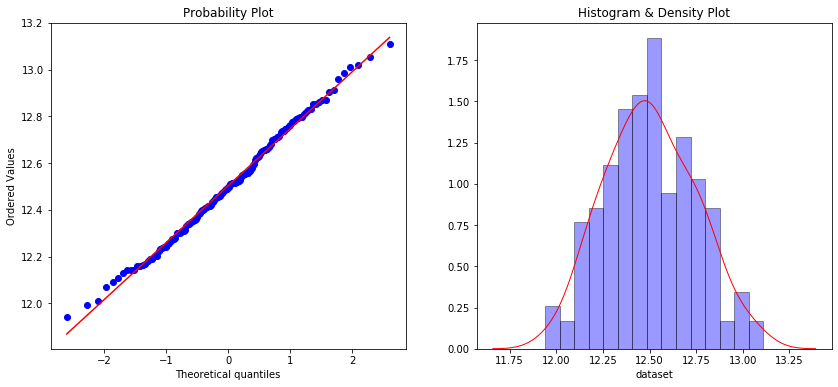

Mean: 12.5033
StdDev: 0.2413
N: 150
AD: 0.2498
P-value: 0.33129
alpha: 0.001
Your data belong to a normal distribution  i.e. The null hypothesis cannot be rejected


In [4]:
normality_test(data.iloc[:,0])